# Veri Ön İşleme - Hazırlama

## İçindekiler


* [Veri Çerçevesi Tanıtımı](#0)

    * [Veri Çerçevesi Hakkında Açıklama](#1)
    * [Özniteliklerin Açıklamaları](#2)
    * [Kütüphaneleri ve Veri Çerçevesini Dahil Etme](#3)
    * [Veri Çerçevesine Hızlı Bir Bakış](#4)


* [Veri Çerçevesini Anlaşılır Kılmak](#5)

    * [Öznitelik İsimlerini Türkçeleştirmek](#6)
    * [Biniş Yerlerini Anlaşılır Hale Getirmek](#7)
    * [Dengeli/Dengesiz Veri Kümesi Kontrolü](#10)
    * [Yeni Öznitelik Çıkarımı (Feature Extraction)](#8)
    * [Gereksiz Özniteliklerin Kaldırılması](#9)


* [Eksik Veriler](#11)

    * [Eksik Verilerin Tespiti](#12)
    * [Eksik Verili Değişkenlerin İlişkisi](#13)
    * [Eşik Değerinden Yüksek Eksik Verili Değişkenin Kaldırılması](#14)
    * [Yaş Verisinin Neden Eksik Olabileceğine Dair Çıkarımlar](#15)
    * [Eksik Yaş Verilerini Doldurmak](#16)
    * [Eksik Biniş Yeri Değerlerini Doldurmak](#17)
    * [Eksik Veri Kalmadığını Teyit Etmek](#18)


* [Kategorik Değerleri Dönüştürme](#19)

    * [Label / One Hot Encoding](#20)
    * [Dummy Variable Oluşturma "get_dummies()"](#21)
    
  
* [Veriyi Ölçeklendirme ve Normalize Etme](#22)  

  
* [Aykırı/Uç Veriler (Outliers)](#23)

    * [ Quartile (Kartiller) ve IQR ile Aykırı Değer Tespiti](#24)


* [Opsiyonel Bonus Bölüm : EDA)](#25)

## Veri Çerçevesi Tanıtımı <a id='0'></a>

### Veri Çerçevesi Hakkında Açıklama <a id='1'></a>

One of the most famous and heartbreaking events in history, the Titanic disaster has impacted people for nearly 100 years. The amount of life lost and the possible ways that the tragedy could have been potentially averted makes the Titanic an incredible event. On the night of April 14, 1912, the vessel that was deem unsinkable proved the world wrong in tragic fashion. Reports aboard the Titanic state that the wireless operators had received warnings from other vessels about large concentrations of icebergs in the area. Some accounts dictate that the wireless operator spoke of more important things to worry about, while many speculate that although aware of the icebergs, Captain Edward John Smith ignored the warnings. During the time of the Titanic Tragedy, it is believed that the vessel was charging ahead at speeds greater than what was recommended.

With sixteen water-tight compartments built into the hull of the boat, designers believed that the vessel could widthstand any sort of impact. When lookout Fred Fleet signaled that there was an iceberg ahead, the Titanic changed course to avoid collision. What happened next began the Titanic disaster. Impact from the collision with the iceberg caused a glancing blow in the side of the Titanic, popping out thousands of rivets and causing her hull to buckle. The Titanic began taking on water and her water-tight compartments began flooding. Most passengers were unaware of the collision; some had felt a small quiver, while some had seen the iceberg before the impact. With as many as four of the water-tight compartments flooded, the Titanic tragedy may have still been avoided, but five compartments had been punctured and the ship began to sink rapidly.

Somewhat lax lifeboat regulations of the time only required 16 lifeboats on the vessel, and the regulations were not based on capacity, but rather size of the vessel. Many are aware that the insufficient number of lifeboats was a large contributing factor to the number of fatalities in the Titanic disaster. During the panic and disarray, some lifeboats were lowered into the Atlantic at only half capacity while others floated away. As the legends all dictate, the band in fact did continue playing as the ship sank. A women and children first policy made a great number of deaths on the Titanic male. Out of the 2223 passengers aboard the Titanic, only 706 survived.

The Titanic tragedy has impacted and moved individuals almost 100 years after occurring and remains one of the most famous and tragic maritime disasters in history. Discovery of the Titanic wreckage in 1985 has supplied historians with new information regarding the Titanic disaster. New Titanic artifacts are being uncovered and new items are being donated to historians to paint a better picture of what exactly happened on the night of April 14, 1912. With planned expeditions and artifacts being continuously obtained, the hope is to shed more light on the Titanic disaster and find out new pieces of information about an event that shaped history.

Source: http://www.titanicuniverse.com/titanic-disaster 

### Özniteliklerin Açıklamaları <a id='2'></a>

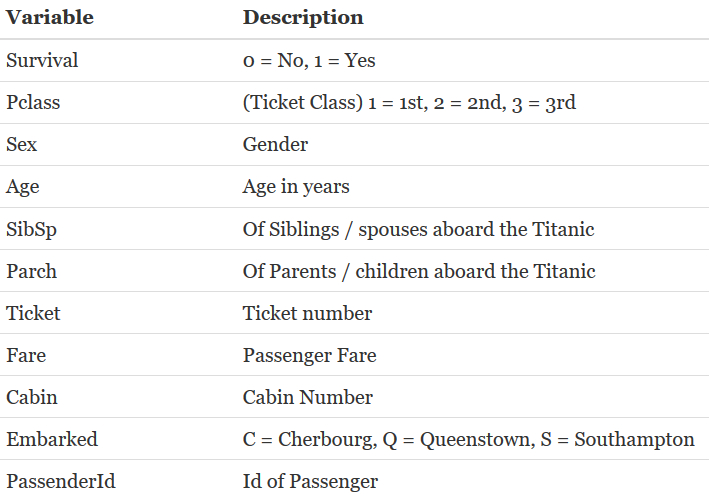

### Kütüphaneleri ve Veri Çerçevesini Dahil Etme <a id='3'></a>

In [1]:
import pandas as pd               # dataframe manipülasyon işlemleri için kullanacağız.
import numpy as np                # vektörel ve matris işlemleri için kullanacağız.
import seaborn as sns             # görselleştirme yapmak için kullanacağız.
import missingno                  # eksik verileri daha iyi okumak için kullanacağız.
from sklearn import preprocessing   # ön işleme aşamasında label encoding vb. için dahil ettik.
import re                         # regular expression yani düzenli ifadeler kullanmak için dahil ettik.

C:\Users\murat\.conda\envs\muratxs\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


df isimli bir değişken yaratıp read_csv() aracılığıyla dizinimizde bulunan csv dosyasını çekirdeğe dahil edelim.

In [3]:
df = pd.read_csv("titanic.csv")

### Veri Çerçevesine Hızlı Bir Bakış <a id='4'></a>

İlk 5 gözlemini tüm özniteliklerle birlikte gözlemleyelim.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Bu veri çerçevesinin değişken ve gözlem sayısı nedir? 

In [5]:
df.shape

(891, 12)

Bu 12 değişkenin tipleri nedir?

In [6]:
df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Acaba veri çerçevesinde eksik gözlem var mı? Veri çerçevesi hakkında daha detaylı bilgiler edinelim.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Hangi değişkende kaç adet eksik gözlem var?

In [13]:
df.isnull().sum().sum()  # df.isna().sum() kodu da aynı çıktıyı vermektedir.

866

Tüm sayısal değişkenlerin temel istatistik değerlerini görmek istesek?

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Sayısal değişkenler arasında korelasyon ilişkisi var mı? Korelasyon matrisi çizdirelim.

In [15]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Daha iyi okuyabilmek için ısı haritası çizdirelim.

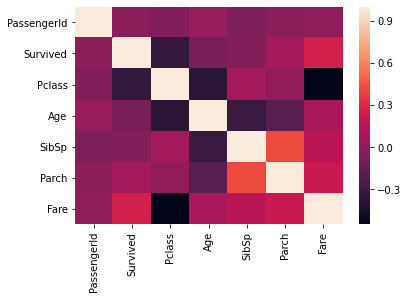

In [16]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

## Veri Çerçevesini Anlaşılır Kılmak <a id='5'></a>

### Değişken İsimlerini Türkçeleştirmek <a id='6'></a>

Değişken isimlerini gözlemleyelim.

In [17]:
df.columns = [ "bilet no.", ".."]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.columns = ['YolcuNo', 'YasiyorMu', 'YolcuSinifi', 'Ad', 'Cinsiyet', 'Yas', 'EsDostSayisi', 'EbeveynCocukSayisi', 'BiletNo', 'Ucret', 'Kabin', 'BinisYeri']
df.head()

,YolcuNo,YasiyorMu,YolcuSinifi,Ad,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,BiletNo,Ucret,Kabin,BinisYeri
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Biniş Yeri Değerlerini Açmak <a id='7'></a>

Biniş Yeri değişkenini daha anlaşılır hale getirelim.

In [19]:
BinisYeri = df["BinisYeri"].copy()
BinisYeri.head()

0    S
1    C
2    S
3    S
4    S
Name: BinisYeri, dtype: object

Biniş yerinin benzersiz değerlerini görüntüleyelim.

In [20]:
BinisYeri.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Biniş yeri değerlerini daha anlaşılır isimleriyle değiştirelim.

In [21]:
BinisYeri.replace("C", "Cherbourg", inplace = True)
BinisYeri.replace("S", "Southampton", inplace = True)
BinisYeri.replace("Q", "Queenstown", inplace = True)

In [22]:
df["BinisYeri"] = BinisYeri
df.head()

,YolcuNo,YasiyorMu,YolcuSinifi,Ad,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,BiletNo,Ucret,Kabin,BinisYeri
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


### Dengeli Dengesiz Veri Kümesi  <a id='10'></a>

Titanic veri çerçevesinin temel amacı yolcuların yaşıyor olup olmadığını tahmin eden bir makine öğrenmesi modeli kurmak. Elimizdeki veri çerçevesinde yolcuların kaçının yaşayıp kaçının yaşamadığını görselleştirme aracı ile sorgulayalım.

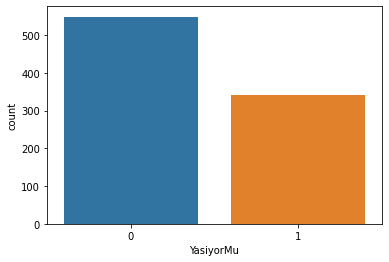

In [23]:
sns.countplot(df["YasiyorMu"]); # countplot o değişkenin benzersiz değerlerini saydırarak barplot çizdiriyordu.

500'ün üzerinde gözlemin 0 değeri aldığını görüyoruz, yani çoğunluğu hayatını kaybetmiş. Yaklaşık 300'ün üstünde de hayatta kalan var. O halde veri çerçevemiz için dengeli değildir fakat çok dengesiz de değildir yorumunu yapabiliriz. 

Grafikte tam olarak anlaşılmayabilir, daha net değerler elde etmek için value_counts() fonksiyonu ile YasiyorMu değişkeninin aldığı benzersiz değerlerin adetlerini görüntüleyelim.

In [24]:
df["YasiyorMu"].value_counts()  # 549 kişi ölü, 342 kişi sağ.

0    549
1    342
Name: YasiyorMu, dtype: int64

### Yeni Öznitelik Çıkarımı (Feature Extraction) <a id='8'></a>

Ad değişkeninde ünvan değerleri saklı ve adın ne olduğu bizim için bir önem arz etmiyor. Dolayısıyla ünvan isimli bir öznitelik çıkarımı yaparsak büyük resmi daha net görebiliriz.

In [25]:
df

,YolcuNo,YasiyorMu,YolcuSinifi,Ad,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,BiletNo,Ucret,Kabin,BinisYeri
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [35]:
df["Ad"][0:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Ad, dtype: object

Unvan çıkarımı için bir fonksiyon yazalım, burada fonksiyon içinde kullanılan regex düzenli ifadesi karışık görünebilir. Aslında şu anlama geliyor virgül görene kadar git ve virgül gördükten sonra bir karakter daha ilerle ve cımbızlamaya başla, cımbızlamayı nokta görünce sonlandır ve noktayı dahil etme.

In [29]:
def unvan_cikarimi(ad):
    ad = re.sub(".*,.([^.]*)\\..*", "\\1", ad)
    return ad

In [30]:
unvan_cikarimi("Dooley, Mr. Patrick")

'Mr'

In [31]:
unvan_cikarimi("Montvila, Rev. Juozas")

'Rev'

In [32]:
unvan_cikarimi("Graham, Miss. Margaret Edith")

'Miss'

Görüldüğü üzere yazılan regex ifadesi gayet başarılı şekilde çalışıyor. Bu regex ifadesi Python'a özeldi ancak R'da da aynı söz dizimi ile yazıldığını test ve teyit ettim. Sanırım tüm dillerde regex çalışmak mümkündür ve tüm dillerdeki regex kuralları birbirine çok benzer söz dizimi ile çalışmaktadır. Bazı diller arası ufak ifade farklılıkları olsa da regex temelde aynı şeyi ifade eder. Regex, metin madencilerinin en değerli kazması olarak düşünülebilir.

İsteyenler regex çalışmak için şu siteyi https://regexr.com/ kullanabilir.

apply() fonksiyonu ile veri çerçevesinin tüm "Ad" gözlemlerine unvan_cikarimi fonksiyonunu uygulayalım ve unvan değişkenine atayalım.

In [34]:
unvan = df["Ad"].apply(unvan_cikarimi)
unvan

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Ad, Length: 891, dtype: object

Veri çerçevesinde yeni bir değişken oluşturalım ve bu değişkene unvan değişkenini atayalım.

In [36]:
df["Unvan"] = unvan  # yeni bir öznitelik yarattık (feature extraction) ve çok işimize yarayacak.

In [37]:
df.head()

,YolcuNo,YasiyorMu,YolcuSinifi,Ad,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,BiletNo,Ucret,Kabin,BinisYeri,Unvan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr


Bakalım birbirinden benzersiz hangi ünvan değerleri var?

In [38]:
df["Unvan"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Bu benzersiz ünvan değerleri kaç adet?

In [39]:
df["Unvan"].nunique()

17

Aslında 17 ünvan (veya herhangi bir problemde 17 farklı kategori) güzel bir şey değil. Mesela görselleştirmeye kalksak 17 sini birden algılayabilmek, ifade edebilmek çok zor. Ayrıca bu ünvan değerlerinin çoğu aynı şeyi temsil ediyor. Mesela soyluları farklı renklerde ifade etmek için bir sürü değer türetilmiş. Bu benzersiz değerleri daraltalım.

In [40]:
for i,j in enumerate(unvan):
    
    if j == "Mme":   
        unvan[i] = "Mrs"              # evli veya bekar kadın ve erkekleri temsil etmek için
        
    elif j == "Mlle" or j == "Ms":    # Mme, Mrs, Miss, Mr, Mlle gibi ünvanlar mevcuttur. 
        unvan[i] = "Miss"
        
    elif j == "Major" or j == "Dr" or j == "Capt" or j == "Col" or j == "Rev":  
        unvan[i] = "Ranked"  # hali vakti yerinde olan zengin insanlar
        
    elif j == "Lady" or j == "Dona" or j == "the Countess" or j == "Don" or j == "Sir" or j == "Jonkheer": 
        unvan[i] = "Royalty"  # soylular, kontesler,  dükler, prensesler, majesteleri

In [41]:
df["Unvan"] = unvan
df.head()

,YolcuNo,YasiyorMu,YolcuSinifi,Ad,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,BiletNo,Ucret,Kabin,BinisYeri,Unvan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr


In [42]:
df["Unvan"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Ranked'], dtype=object)

In [43]:
df["Unvan"].nunique()

6

### Gereksiz Öznitelikleri Kaldırmak <a id='9'></a>

Yolcunun numarasının kuracağımız tahmin modeli için bir anlamı olamayacağını düşünüyoruz ve kaldırabiliriz.

In [45]:
df.drop( "YolcuNo", axis = 1, inplace = True)

Yolcunun ismi artık bizim için değersizdir! Çünkü cinsiyetini biliyoruz, yaşını biliyoruz ve belki daha önemlisi ünvanını biliyoruz. İsmi Braund olmuş, William olmuş ne fark eder?

Ayrıca BiletNo değişkenini de aynı fonksiyon içerisinde kaldıralım. Bilet Numarası bizim için pek anlam ifade etmiyor. Zaten yolcuların hangi sınıfta barındığını ve yolculuk için ne kadar ücret ödediğini biliyoruz. Biletten yeni bir öznitelik çıkarmaya ihtiyacımız yok gibi görünüyor. 

Birden fazla özniteliği silmek için ilave köşeli parantez açmamız gerekecek.

In [50]:
df.drop(["Ad","BiletNo" ], axis = 1, inplace = True)

In [51]:
df.head()

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,Kabin,BinisYeri,Unvan
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,Mr
1,1,1,female,38.0,1,0,71.2833,C85,Cherbourg,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,Miss
3,1,1,female,35.0,1,0,53.1000,C123,Southampton,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,Mr


## Eksik Değerler (NA, NaN, Null, None, Missing Value etc.) <a id='11'></a>

### Eksik Değerlerin Tespiti <a id='12'></a>

Veri çerçevesinde toplamda kaç adet eksik gözlem var?

In [52]:
df.isnull().sum().sum()

866

Bu eksik gözlemler hangi değişkenlere ait ve kaçar adet?

In [53]:
df.isnull().sum()

YasiyorMu               0
YolcuSinifi             0
Cinsiyet                0
Yas                   177
EsDostSayisi            0
EbeveynCocukSayisi      0
Ucret                   0
Kabin                 687
BinisYeri               2
Unvan                   0
dtype: int64

### Eksik Verili Değişkenlerin İlişkisi <a id='13'></a>

Eksik değerler barındıran 3 özniteliğimiz var. 

"Bu üç öznitelikte eksik değerler rassal şekilde mi meydana geldi yoksa bu değişkenlerin eksik değerleri arasında bir ilişki var mı?" sorusunu görselleştiriyoruz.

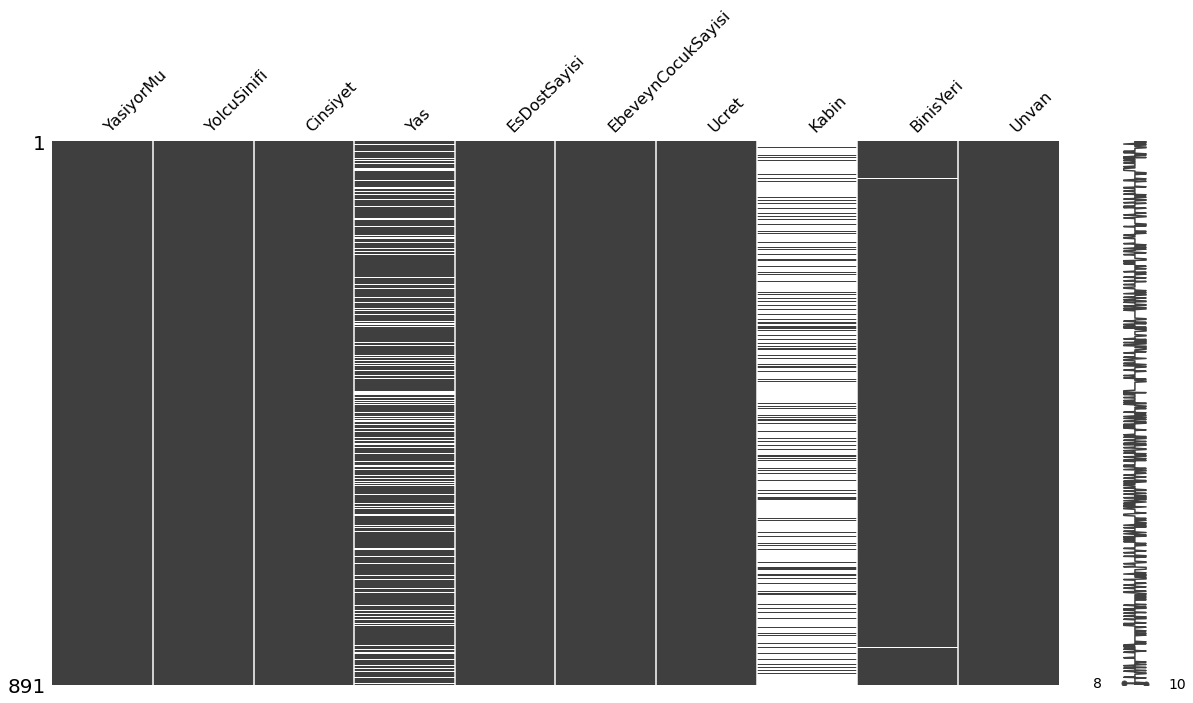

In [54]:
missingno.matrix(df, figsize=(20, 10));

Aşağıdaki matrise bakılırsa yaş ve kabin değişkenlerindeki eksik değerler (her beyaz çizgi eksik bir değeri temsil ediyor) arasında bir ilişkiyi fark edebilmek çok zor. Bu eksik değer barındıran değişkenler arasında anlamlı bir ilişki var mı? sorusunun cevabı için ısı haritası çizdirebiliriz.

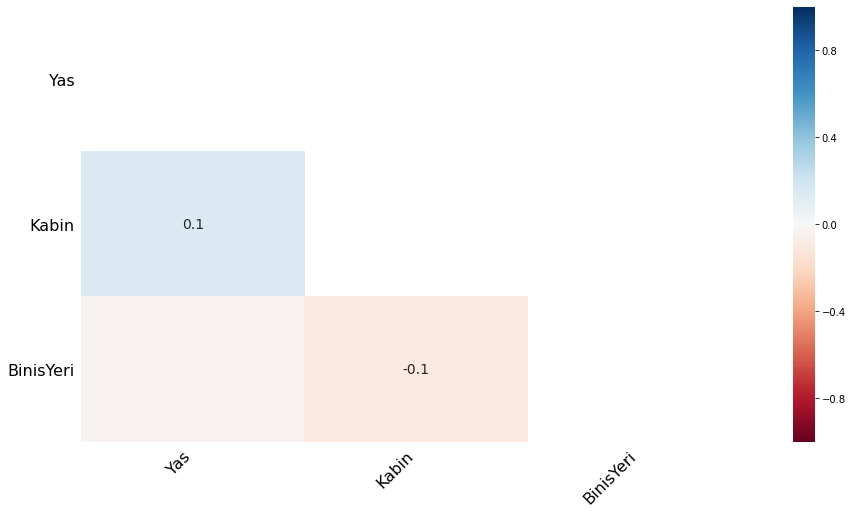

In [55]:
missingno.heatmap(df, figsize= (15,8));

Yaş ve Kabin değişkenlerinin aynı gözlemde eksik veri barındırmadığını aldığı 0.1 değerinden anlayabiliyoruz, bu yok sayılabilecek kadar güçsüz bir ilişki, hatta nötr (ilişki yok) de denilebilir.

Şimdi "bu eksik gözlemler toplam gözlem sayısının yüzde kaçına tekabül ediyor?" sorusunun cevabı için bir fonksiyon yazalım.

In [56]:
df.isnull().sum()

YasiyorMu               0
YolcuSinifi             0
Cinsiyet                0
Yas                   177
EsDostSayisi            0
EbeveynCocukSayisi      0
Ucret                   0
Kabin                 687
BinisYeri               2
Unvan                   0
dtype: int64

In [57]:
def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son

Fonksiyon veri çerçevesini alıyor ve geriye bir tablo dönüyor. Kendi veri çerçevemizi vererek çalıştıralım.

In [58]:
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
YasiyorMu,0,0.000000
YolcuSinifi,0,0.000000
Cinsiyet,0,0.000000
Yas,177,19.865320
EsDostSayisi,0,0.000000
EbeveynCocukSayisi,0,0.000000
Ucret,0,0.000000
Kabin,687,77.104377
BinisYeri,2,0.224467
Unvan,0,0.000000


Kabin değişkenine bakarsak 77% si eksik gözlem. Peki kabinde ne gibi değerler vardı, tekrar gözlemleyelim?

In [59]:
df["Kabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Birbirinden benzersiz onlarca değer var ve üstelik 77%si eksik gözlem. Yolcuların hayatta kalmasını etkiliyorsa dahi bu kadar eksik gözlemden ve benzersiz değerden anlam çıkarmamız çok zor. Gönül rahatlığıyla bu değişkeni silinebilir.

Silmek için eşik değer yaratalım. Toplam gözlem sayısının %30'unu eşik değer belirtelim. Bundan daha fazla eksik gözlemimiz varsa o değişkeni kaldıracak kodu yazalım. Bu durumda sadece kabin değişkenini silmiş olmayı planlıyoruz.

Normalde kabin değişkenini silmek için df.drop("Kabin") yazmamız yeterli. 

Fakat çok büyük veri çerçevesi ve çok sayıda öznitelikle çalışacağımızı düşünerek eşik değeri yaratalım ve bu eşik değeri ile silme işlemini gerçekleştirelim.

### Eşik Değerinden Yüksek Eksik Verili Değişkenin Kaldırılması <a id='14'></a>

In [60]:
esikDeger = len(df) * .3  # eşik değer yaratıyoruz, toplam gözlem sayısının 30%'ı kadarını belirledik. (891 * 0.3 = 267)
df.dropna(thresh = esikDeger, axis = 1, inplace = True)  # thresh parametresine eşik değeri vererek bundan daha fazla ise drop ediyoruz.

In [61]:
df.isna().sum()

YasiyorMu               0
YolcuSinifi             0
Cinsiyet                0
Yas                   177
EsDostSayisi            0
EbeveynCocukSayisi      0
Ucret                   0
BinisYeri               2
Unvan                   0
dtype: int64

Görüldüğü üzere Kabin değeri 30%'dan daha fazla eksik gözlem içerdiği için kaldırıldı.

Şimdi yaş değişkenine odaklanalım ve nasıl manipüle edeceğimiz üzerine düşünelim.

### Yaş Verisinin Neden Eksik Olabileceğine Dair Çıkarımlar <a id='15'></a>

#### Önemli Not :

Eğer cinsiyet kısmında eksik gözlem olsaydı yeni yarattığımız ünvan özniteliğindeki Mr. Miss. Mrs. (bekar kadın, evli veya bekar erkek) gibi değerlerden yola çıkarak kolaylıkla cinsiyeti doldurabilirdik. Peki yaş için nasıl bir yol izleyebiliriz? 


#### Çözülmesi Gereken Problemler : 

Neden yaş değişkeni eksik? Muhtemelen her yaştan insan gemiye kabul ediliyordu yani yaşları tutmadığı için bu değerin girilmemesi söz konusu değil. O halde neden bazı kişilerin yaşları girilmemiş olabilir? 

Bir hipotez ortaya atalım.

- Yaş gözlemi eksik olan yolcular önemsiz yolculardır, gerek görülmediği için yaş değerleri eksiktir.

Bu hipotezi reddedilebilir veya reddedilemez olduğunu öngörmek için görselleştirmeler yapalım.

Yaşları eksik olan gözlemleri tüm öznitelikleriyle görüntüleyelim, göze çarpan bir şey var mı?

In [62]:
df[  df["Yas"].isnull()   ]

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,BinisYeri,Unvan
5,0,3,male,NaN,0,0,8.4583,Queenstown,Mr
17,1,2,male,NaN,0,0,13.0000,Southampton,Mr
19,1,3,female,NaN,0,0,7.2250,Cherbourg,Mrs
26,0,3,male,NaN,0,0,7.2250,Cherbourg,Mr
28,1,3,female,NaN,0,0,7.8792,Queenstown,Miss
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,Cherbourg,Mr
863,0,3,female,NaN,8,2,69.5500,Southampton,Miss
868,0,3,male,NaN,0,0,9.5000,Southampton,Mr
878,0,3,male,NaN,0,0,7.8958,Southampton,Mr


Yaşı eksik olan gözlemleri veri çerçevesinden kaldırmak veya onları ortalama bir değer ile doldurmak çok kolay. 

Zor olan yaşlarının eksikliklerinde yatan sebebi keşfetmek.

Sadece 10 gözlem görüntülendi fakat dikkatimizi çeken şey ünvan kısmında Mr, Mrs ve Miss olmasıydı, soylu olmadıkları için yaşları önemsenmemiş olabilir mi? Daha iyi anlamak için fotoğrafını çekelim ve zoom yapalım.

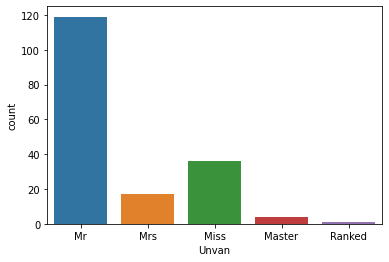

In [63]:
sns.countplot(df[df["Yas"].isnull()]["Unvan"]);
# eksik yaş değerine sahip insanların unvan frekanslarını görüntüledik.

Yaş değeri eksik olan gözlemlerin büyük çoğunluğu soylu olmayan insanlardan oluşuyor.

Peki acaba yaş değerinin eksikliğiyle biniş yerinin ilgisi olabilir mi?

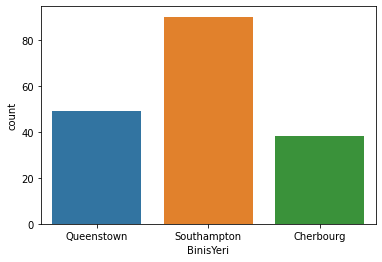

In [64]:
sns.countplot(df[df["Yas"].isnull()]["BinisYeri"]);

Yaş değerinin eksikliğiyle cinsiyetin ilgisi olabilir mi?

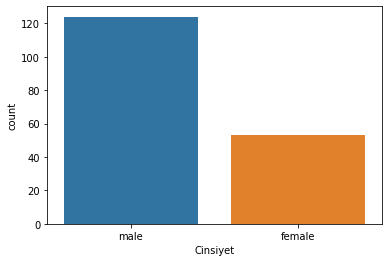

In [65]:
sns.countplot(df[df["Yas"].isnull()]["Cinsiyet"]);

Yaş değerinin eksikliğiyle yolcuların sınıfının ilgisi olabilir mi?

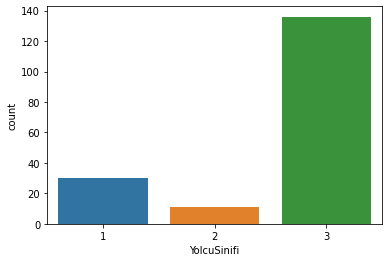

In [66]:
sns.countplot(df[df["Yas"].isnull()]["YolcuSinifi"]);

Yaş değeri girilmemiş yolcuların çok büyük bir kısmı 3. sınıf yolcular. 

Dolayısıyla soylu olmayan ve üçüncü sınıf yolcuların yaşlarının önemsenmediğini öne sürebiliriz. 

Biletler için ödenen ücret değişkenine bakarak iddiamızı güçlendirebilir miyiz?

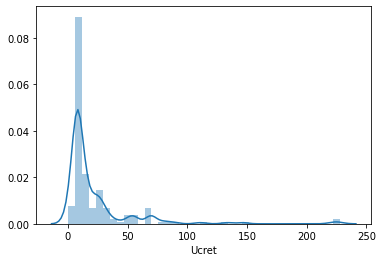

In [67]:
sns.distplot(df[df["Yas"].isnull()]["Ucret"]);

In [68]:
df[df["Yas"].isnull()]["Ucret"].mean()

22.15856666666667

Evet yaş değeri eksik olan yolcuların çoğu ucuz biletler almış. Peki bu yaş değeri girilmeyen kişilerin hayatta kalıp kalmadığına bakalım.

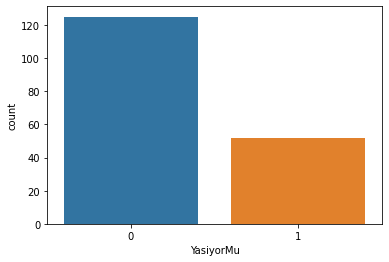

In [69]:
sns.countplot(df[df["Yas"].isnull()]["YasiyorMu"]);

Kutu grafiğinde görüldüğü üzere yaş değeri girilmeyen insanların çoğu ölmüş.

#### Çıkarımda bulunalım; 

Yaş değeri eksik olan 177 yolcu tespit edilmiştir. 

Bu yolcuların çoğu 3. sınıf yolcudur.

Dolayısıyla bu yolcuların biletlerinin en ucuz olduğu teyit de edilmiştir.

Bu yolcuların tamamı (1 kişi hariç) sıradan vatandaştır.

Bu yolcuların çoğunluğu erkektir ve yine çoğunluğu hayatını kaybetmiştir.

Niçin yaş değerlerinin neden eksik olduğu hakkında çıkarımda bulunmaya çalıştık ? 

Eksik verileri manipüle etmek hem kullanışlı hem de bir o kadar tehlikelidir. Eğer eksik veriler rassal bir şekilde oluştuysa rassallığı bozmayacak şekilde doldurulabilir ancak verilerin eksik olmasının altında bir anlam yatıyorsa bu ilişki tespit edilmeli ve ona göre bir aksiyon alınmalıdır. Aksi halde yanlış şekilde manipüle edilen eksik veriler modelin genelleyebilme kapasitesini düşürebilir ve yanlılığa sebep olabilir.

### Eksik Yaş Verilerini Doldurmak  <a id='16'></a>

Eksik yaş değerlerini en uygun şekilde doldurmak için groupby() fonksiyonunu kullanabiliriz.

In [70]:
df.groupby("Unvan").mean()

,YasiyorMu,YolcuSinifi,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret
Unvan,,,,,,
Master,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,0.702703,2.291892,21.845638,0.702703,0.540541,43.800092
Mr,0.156673,2.410058,32.368090,0.288201,0.152805,24.441560
Mrs,0.793651,1.992063,35.788991,0.690476,0.825397,45.330290
Ranked,0.277778,1.444444,46.705882,0.333333,0.111111,35.786344
Royalty,0.600000,1.000000,41.600000,0.400000,0.000000,42.150000


Özniteliklerin hepsi bizi ilgilendirmiyor. Ünvanların sadece yaşa göre ortalamalarına odaklanalım.

In [71]:
df.groupby("Unvan")[["Yas"]].mean()

,Yas
Unvan,
Master,4.574167
Miss,21.845638
Mr,32.368090
Mrs,35.788991
Ranked,46.705882
Royalty,41.600000


Yaşı eksik değer olan Master'lara göz atalım.

In [72]:
df[(df["Unvan"] == "Master") & (df["Yas"].isnull())]

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,BinisYeri,Unvan
65,1,3,male,NaN,1,1,15.2458,Cherbourg,Master
159,0,3,male,NaN,8,2,69.5500,Southampton,Master
176,0,3,male,NaN,3,1,25.4667,Southampton,Master
709,1,3,male,NaN,1,1,15.2458,Cherbourg,Master


Bu master'ların yaşlarını doldurmak için eksik değerler barındıran indexlerini bir değişkene atayalım.

In [73]:
master_yaslar = df[(df["Unvan"] == "Master") & (df["Yas"].isnull())].index
master_yaslar

Int64Index([65, 159, 176, 709], dtype='int64')

".loc" yardımıyla ilk parametremizi indisler, ikinci parametremizi ise öznitelik girerek 4 eksik yaş değerini 5 ile dolduralım.

In [74]:
df.loc[master_yaslar,"Yas"] = 5 # 5 ile doldur, çünkü master ünvanına sahip kişilerin yaş ortalaması 4.5

Diğer ünvanların da eksik yaş değerlerini ünvanları gruplayarak tespit edelim.

In [75]:
miss_yaslar = df[(df["Unvan"] == "Miss") & (df["Yas"].isnull())].index
mr_yaslar = df[(df["Unvan"] == "Mr") & (df["Yas"].isnull())].index
mrs_yaslar = df[(df["Unvan"] == "Mrs") & (df["Yas"].isnull())].index
ranked_yaslar = df[(df["Unvan"] == "Ranked") & (df["Yas"].isnull())].index

Ve diğer ünvanların eksik yaş değerlerini ünvanları gruplayarak elde ettiğimiz ortalama yaş değerleri ile dolduralım.

In [76]:
df.loc[miss_yaslar ,"Yas"] = 22
df.loc[mr_yaslar ,"Yas"] = 33
df.loc[mrs_yaslar ,"Yas"] = 35
df.loc[ranked_yaslar ,"Yas"] = 46

Kontrol edelim.

In [77]:
df.isnull().sum()["Yas"]

0

Bir de bu açıdan kontrol edelim.

In [81]:
df["Yas"].unique()

array([22, 38, 26, 35, 33, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17,
       32, 16, 25,  0, 30, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

Eksik değerler yok ancak fark ettiyseniz ondalıklı sayılar var. Yaş değerleri ondalıklı sayılardan oluşamaz. Hepsini tam sayıya yuvarlayalım.

In [80]:
df["Yas"] = df["Yas"].astype(int)

Tüm eksik gözlemleri ünvan değerinden faydalanarak en uygun değerler ile doldurduk. Ondalıklı yaş değerlerini de tam sayıya yuvarladık.

### Eksik Biniş Yeri Değerlerini Doldurmak <a id='17'></a>

Biniş yeri eksik değer barındıran gözlemleri görüntüleyelim.

In [82]:
df[  df["BinisYeri"].isnull()  ]

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,BinisYeri,Unvan
61,1,1,female,38,0,0,80.0,NaN,Miss
829,1,1,female,62,0,0,80.0,NaN,Mrs


First class yolculuk yapan iki kadının biniş yeri eksik değer barındırıyor. İki kadın da aynı ücreti ödediği için ve aynı sınıfta yolculuk yaptığı için muhtemelen aynı yerden bindiler.

First Class yolculuk yapan ve ödediği bilet ücreti 60 ile 100 arasında olan yolcuların çoğunlukla nereden bindiğini görmek istiyoruz. Çünkü bu iki yolcunun nereden bindiğini tespit etmek için ona en yakın ücreti ödeyen ve aynı sınıfta yolculuk yapan yolcular bize fikir verebilir. 

Bu yolcuların biniş yerlerini countplot ile görselleştirelim.

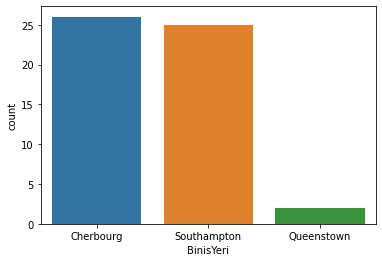

In [83]:
sns.countplot(df[(df["YolcuSinifi"] == 1) & (df["Ucret"] > 60) & (df["Ucret"] < 100)]["BinisYeri"]);

Queenstown olma ihtimali yok denecek kadar az. Southampton ve Cherbourg olması muhtemel.

Eksik biniş yerlerinin olduğu indisleri tespit edelim.

In [84]:
eksik_binis_yeri = df[df["BinisYeri"].isnull()].index
eksik_binis_yeri

Int64Index([61, 829], dtype='int64')

Eksik biniş yerlerinin olduğu iki indise de "Cherbourg" değerini atayalım.

In [85]:
df.loc[eksik_binis_yeri, "BinisYeri"] = "Cherbourg"

Tüm eksik gözlem işlemlerinin tamamlandığını son kez teyit edelim.

In [86]:
df.isna().sum().sum()

0

### Eksik Veri Kalmadığını Teyit Etmek <a id='18'></a>

#### Önemli Not : 

Eksik gözlem her zaman isna() fonksiyonu ile görüntülenemeyebilir. Bazen eksik gözlem yerine boşluk karakteri girilebilir. Bazen de eksik gözlem için "nan" gibi metinler girilebilir. Bazen eksik gözlem yerine "boş", "yok" gibi metinler girilebilir. 

O yüzden şüpheli gördüğümüz değişkenlerin benzersiz değerlerine bakarak sağlamasının yapılması gerekir. 

In [87]:
df["Cinsiyet"].unique()

array(['male', 'female'], dtype=object)

In [88]:
df["YolcuSinifi"].unique()

array([3, 1, 2], dtype=int64)

In [89]:
df["BinisYeri"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

## Kategorik Değerleri Dönüştürme  <a id='19'></a>

In [90]:
df

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,BinisYeri,Unvan
0,0,3,male,22,1,0,7.2500,Southampton,Mr
1,1,1,female,38,1,0,71.2833,Cherbourg,Mrs
2,1,3,female,26,0,0,7.9250,Southampton,Miss
3,1,1,female,35,1,0,53.1000,Southampton,Mrs
4,0,3,male,35,0,0,8.0500,Southampton,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,Southampton,Ranked
887,1,1,female,19,0,0,30.0000,Southampton,Miss
888,0,3,female,22,1,2,23.4500,Southampton,Miss
889,1,1,male,26,0,0,30.0000,Cherbourg,Mr


### Label / One-Hot Encoding <a id='20'></a>

Cinsiyet değişkeninde bulunan "male" ve "female" ifadeleri bilgisayarın anlayacağı formatta değildir. Dolayısıyla label encoding yapmak için çağırdığımız kütüphaneden bir değişken oluşturalım ve male, female değerleri için 0, 1 dönüşümü yapalım.

In [91]:
label_encoder = preprocessing.LabelEncoder()

In [92]:
df['Cinsiyet'] = label_encoder.fit_transform(df['Cinsiyet'])
df.head()

# Önemli not: İlk değeri 1 yaptı yani Male : 1, Female : 0 değerlerini temsil ediyor.

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,BinisYeri,Unvan
0,0,3,1,22,1,0,7.2500,Southampton,Mr
1,1,1,0,38,1,0,71.2833,Cherbourg,Mrs
2,1,3,0,26,0,0,7.9250,Southampton,Miss
3,1,1,0,35,1,0,53.1000,Southampton,Mrs
4,0,3,1,35,0,0,8.0500,Southampton,Mr


Dikkat, eğer üçüncü bir cinsiyet olsaydı söz konusu label encoding yapamazdık. Çünkü o zaman üçü arasında sayısal bir ilişki olduğu anlamına gelebilecekti (1 küçüktür 2'den, 3 büyüktür 2'den gibi). 

Halbuki cinsiyet bir nominal değişken ve cinsiyetlerin birbirlerine üstünlükleri yoktur.

### Dummy Variable Oluşturma "get_dummies()" <a id='21'></a>

Yolcu sınıfı için dummy variables yaratalım.

In [93]:
df['YolcuSinifi'] = pd.Categorical(df['YolcuSinifi'])
dfDummies = pd.get_dummies(df['YolcuSinifi'], prefix = 'YolcuSinifi')
dfDummies

,YolcuSinifi_1,YolcuSinifi_2,YolcuSinifi_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [94]:
df = pd.concat([df, dfDummies], axis=1)
df.head()

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,BinisYeri,Unvan,YolcuSinifi_1,YolcuSinifi_2,YolcuSinifi_3
0,0,3,1,22,1,0,7.2500,Southampton,Mr,0,0,1
1,1,1,0,38,1,0,71.2833,Cherbourg,Mrs,1,0,0
2,1,3,0,26,0,0,7.9250,Southampton,Miss,0,0,1
3,1,1,0,35,1,0,53.1000,Southampton,Mrs,1,0,0
4,0,3,1,35,0,0,8.0500,Southampton,Mr,0,0,1


#### Önemli Not : 
Veri çerçevesinde aynı değeri ifade eden pek çok değişken oluştu. Bu değişkenler aynı şeyi ifade ettiği için bir makine öğrenmesi modeli kurulduğunda yanıltıcı olacaktır. Aynı şeyi ifade eden değişkenleri silelim. 

YolcuSinifi değişkenini silinmelidir çünkü zaten bu değişkene ait 3 adet dummy variables ürettik. 

Ayrıca 3 adet üretilen YolcuSinifi değişkenlerinden birisi de silinmelidir. Mesela YolcuSinifi_1 ve YolcuSinifi_2 değişkenlerine bakarak YolcuSinifi_3'ün değeri hakkında çıkarımda bulunabiliyoruz. Yani aslında iki değişkenin değerini görmek model için yeterli olacaktır. 

O halde YolcuSinifi ve YolcuSinifi_1,2,3 dummy değişkenlerinden birisi makine öğrenmesi modeli kurmadan önce silinmelidir. Biz şimdilik silmiyoruz, silmek istesek aşağıdaki komut çalıştırılabilir.

df.drop(["YolcuSinifi", "YolcuSinifi_3"], axis = 1, inplace = True

(**YolcuSinifi_3 değişkenini silmemin özel bir anlamı yok, herhangi biri silinebilir.**)

## Veriyi Ölçeklendirme ve Normalize Etme <a id='22'></a>

Veri ölçeklendirme ve normalize etme adımları birbirlerine benzer işler gibi görünseler de (hatta birbirleri yerine kullanılsalar da) uygulanma şekilleri farklıdır.

Ölçeklendirme işleminde elimizdeki verinin sadece aralığını (range) değiştirirken (örneğin 0–1 arası ya da 1–100 arası gibi), veriyi normalize etme sürecinde verinin dağılımını normal bir dağılım olarak değiştiriyoruz.

**Dikkat:** 0–1 arasında ölçeklendirme işlemi, günlük hayatta normalizasyon (normalization) olarak adlandırıldığı ve sıkça kullanıldığı için kavram karmaşası buradan gelmektedir.

Yaş değişkeninin sayısal değerlerini 0 ile 1 arasında ölçeklendirelim.

In [95]:
yas = df[['Yas']].values.astype(float) # yas değişkenine df'nin yaş değerlerini atıyoruz.

# Ölçeklendirme için MinMaxScaler fonksiyonunu kullanıyoruz.

min_max_scaler = preprocessing.MinMaxScaler() # min_max_scaler nesnesi yaratıyoruz.
yas_olcekli = min_max_scaler.fit_transform(yas)  # yas değerlerini ölçeklendirip yas_olcekli değişkenine atıyoruz.
df['Yas_Olcekli'] = pd.DataFrame(yas_olcekli)  # df'ye yeni bir değişken yaratıp yas_olcekli değerlerini atıyoruz

Yas_Olcekli değişkenini kontrol amaçlı yazdıralım.

In [96]:
df.head()

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,BinisYeri,Unvan,YolcuSinifi_1,YolcuSinifi_2,YolcuSinifi_3,Yas_Olcekli
0,0,3,1,22,1,0,7.2500,Southampton,Mr,0,0,1,0.2750
1,1,1,0,38,1,0,71.2833,Cherbourg,Mrs,1,0,0,0.4750
2,1,3,0,26,0,0,7.9250,Southampton,Miss,0,0,1,0.3250
3,1,1,0,35,1,0,53.1000,Southampton,Mrs,1,0,0,0.4375
4,0,3,1,35,0,0,8.0500,Southampton,Mr,0,0,1,0.4375


In [97]:
df["Yas_Olcekli"].min()

0.0

In [98]:
df["Yas_Olcekli"].max()

1.0

In [99]:
df["Yas_Olcekli"].mean()

0.37276936026936025

In [100]:
df["Yas"].mean()

29.82154882154882

## Aykırı/Uç Veriler (Outliers) <a id='23'></a>

Farklı algoritmalar için başa bela olabilen aykırı değerleri her zaman kötülemek ve veriden çıkaracağımızı düşünmek doğru bir yaklaşım değildir. Bazen tek amacımız bu değerleri bulmak hatta bunları gruplayarak, (yapabilirsek) süreç ya da olay bazlı bu durumlarını analiz etmektir.

Bazı makine öğrenmesi modelleri aykırı verilere karşı direnç sahibiyken bazı makine öğrenmesi modelleri aykırı verilere karşı çok dayanıksızdır.

### Quartile (Kartiller) ve IQR ile Aykırı Değer Tespiti <a id='24'></a>

Aykırı (Uç) değerlerin tespitinde farklı yöntemler kullanılabilir. Bunlardan bir tanesi çeyreklik/kartil (quartile) ya da yüzdelik (percentile) yöntemiyle veriyi parçalara ayırdıktan sonra belirlenen sınır değerleri dışında kalan verileri aykırı değer olarak işaretlemektir. 

Aşağıdaki grafikte de görüldüğü gibi kartiller veriyi sıralayarak 4 eşit parçaya böler.

**Not :** Q2 aynı zamanda verimizin medyan değeridir.

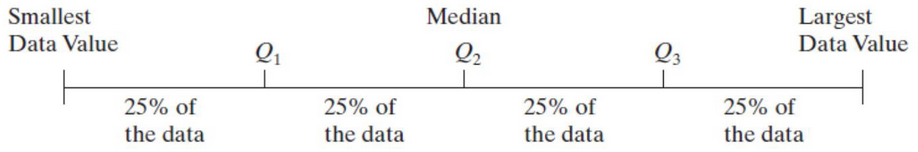

Verinin Q1, Q2, Q3 değerleri bulunduktan sonra Interquartile range (IQR — Çeyrekler açıklığı) hesaplanır. IQR, birinci çeyrek Q1 ve üçüncü çeyrek Q3 arasındaki uzaklıktır. IQR kullanılarak alt ve üst sınır değerleri aşağıdaki gibi hesaplanır.

    IQR = (Q3 – Q1)
    Alt Sınır Değer (ASD)= Q1–1.5(IQR)
    Üst Sınır Değer (ÜSD)= Q3 + 1.5(IQR)

ASD ve ÜSD dışında kalan tüm değerler outlier (aykırı değer) olarak tespit edilir. Veri keşfinde kullandığımız kutu grafikleri (boxplot) kartil mantığında veriyi görselleştirmektedirler. 

Örneğin veri kümemizde Yaş özniteliğine ait değerleri kutu grafiği ile görselleştirmek için seaborn görselleştirme kütüphanesini kullanalım.

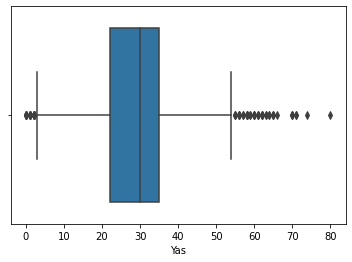

In [101]:
sns.boxplot(x = df['Yas']);

Grafiği incelediğimizde Q1, Q2 ve Q3 değerlerinin sırasıyla 20-30 arası, 30 ve 30-36 arasında hesaplandığını, ASD’nin 0 civarında olduğunu ÜSD’nin de 80 civarında olduğunu görüyoruz.

0 ile 1 arasında ölçeklediğimiz değişkeni de görselleştirelim. Acaba dağılımı bozulmuş mu ? Dağılımının bozulmamış olması gerekir, çünkü normalizasyon yapmadık.

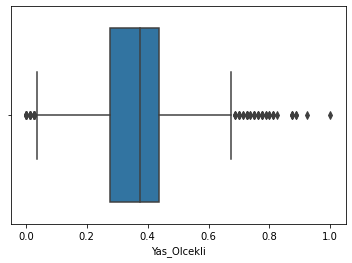

In [102]:
sns.boxplot(x=df['Yas_Olcekli']);

Şimdi aşağıdaki kod satırlarını kullanarak bu hesaplamaları biraz daha net anlayalım.

In [103]:
Q1 = df.Yas.quantile(0.25) 
Q2 = df.Yas.quantile(0.5) 
Q3 = df.Yas.quantile(0.75)
Q4 = df.Yas.quantile(1)

IQR = Q3 - Q1

In [104]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

Grafikte de gördüğümüz üzere veri kümemizde ASD’den küçük veya ÜSD’den büyük aykırı değere sahip örnek bulunmamaktadır. Eğer bu değerlerin olduğunu tespit etseydik aşağıdaki kod satırı ile bu verileri farklı bir dataframe’e kopyalayıp üzerinde çalışma yapabilirdik.

In [105]:
print("Q1 ->", Q1)
print("Q3 ->", Q3)
print("Q2 ->", Q2)
print("Q4 ->", Q4)
print("IQR ->", IQR)

print()

print("Alt sınır: Q1 - 1.5 * IQR ->", alt_sinir)
print("Üst sınır: Q3 + 1.5 * IQR ->", ust_sinir)

Q1 -> 22.0
Q3 -> 35.0
Q2 -> 30.0
Q4 -> 80.0
IQR -> 13.0

Alt sınır: Q1 - 1.5 * IQR -> 2.5
Üst sınır: Q3 + 1.5 * IQR -> 54.5


In [106]:
outliers_df = df[(df["Yas"] < alt_sinir) | (df["Yas"] > ust_sinir)]
outliers_df

,YasiyorMu,YolcuSinifi,Cinsiyet,Yas,EsDostSayisi,EbeveynCocukSayisi,Ucret,BinisYeri,Unvan,YolcuSinifi_1,YolcuSinifi_2,YolcuSinifi_3,Yas_Olcekli
7,0,3,1,2,3,1,21.0750,Southampton,Master,0,0,1,0.0250
11,1,1,0,58,0,0,26.5500,Southampton,Miss,1,0,0,0.7250
15,1,2,0,55,0,0,16.0000,Southampton,Mrs,0,1,0,0.6875
16,0,3,1,2,4,1,29.1250,Queenstown,Master,0,0,1,0.0250
33,0,2,1,66,0,0,10.5000,Southampton,Mr,0,1,0,0.8250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,1,2,1,1,0,2,37.0042,Cherbourg,Master,0,1,0,0.0125
829,1,1,0,62,0,0,80.0000,Cherbourg,Mrs,1,0,0,0.7750
831,1,2,1,0,1,1,18.7500,Southampton,Master,0,1,0,0.0000
851,0,3,1,74,0,0,7.7750,Southampton,Mr,0,0,1,0.9250


In [107]:
outliers_df.shape[0]

66

66 gözlemin(yolcunun) aykırı yaş değerine sahip olduğunu görüyoruz.

In [108]:
df["Yas"].max()

80

In [109]:
df["Yas"].min()

0

BoxPlot un kardeşi sayılabilecek ve detayları görmek için kullandığımız bir diğer grafik violinplot. 

Şişkin olduğu yerler frekansın en sık gözlemlendiği yerlerdir. 

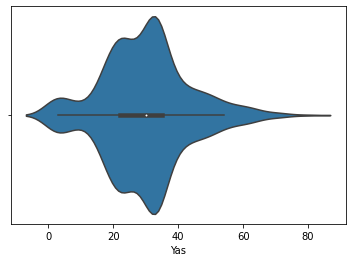

In [110]:
sns.violinplot(x = df['Yas']);

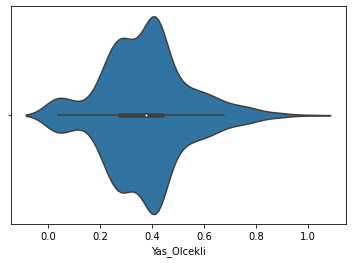

In [111]:
sns.violinplot(x = df['Yas_Olcekli']);

## Opsiyonel Bonus Bölüm   <a id='25'></a>

**EDA, Aggregate, Pivot Table etc.**

Cinsiyet ve hayatta kalma ilişkisini group by ile ortalama kullanarak inceleyelim.

In [ ]:
df.groupby("Cinsiyet")["YasiyorMu"].mean()

Ereklerin : 1, kadınların 0 değeri aldığını biliyoruz.

Hayatta kalanların 1, hayatını kaybedenlerin ise 0 değeri aldığını biliyoruz.

Erkekler (1) için 0.188'in ortalama olduğunu görüyoruz yani büyük bir çoğunluğu ölmüştür.

Kaıdnlar (0) için 0.742'in ortalama olduğunu görüyoruz yani büyük bir çoğunluğu hayatta kalmıştır.

Aşağıdaki kod aracılığıyla, Cinsiyetleri index kısmına yerleştirdik, yolcu sınıflarını ise öznitelik kısımlarına yerleştirdik. Ulaşmak istediğimiz nihai hedefimiz yaşayıp yaşamadıkları ve stratejimiz ise ortalama almak.

In [ ]:
df.groupby(["Cinsiyet", "YolcuSinifi"])["YasiyorMu"].aggregate("mean").unstack()

Bu tabloya bakarak, 

"First Class seyahat eden kadın kadın yolcuların çoğunluğu yaşamıştır." 

"Third Class yolculuk yapan erkek yolcuların çoğunluğu ölmüştür." 

gibi çıkarımlarda bulunabiliriz.

Aynı tabloyu yaş değişkenine kırdırarak da çizdirebiliriz. Böylelikle cinsiyetlerin ve yolcu sınıflarının ortalama yaş değerlerine ulaşırız.

In [ ]:
df.groupby(["Cinsiyet", "YolcuSinifi"])["Yas"].aggregate("mean").unstack()

Eğer yaş değişkenini istediğimiz aralıklarda kesikli hale getirmek istersek cut fonksiyonunu kullanırız.

In [ ]:
yas = pd.cut(df["Yas"], [-1, 15, 35, 90]) # yaşları (0 - 15), (15 - 35), (35 - 90) olarak kategorize ettik.
yas.sample(10)

In [ ]:
yas.unique()

In [ ]:
yas.nunique()

Şimdi ücret değişkenini kesikli hale getirelim. Ancak biz sadece kategori sayısını verelim. Ücret değişkenini 3 adet kategoriye bölmesini istiyoruz, bunu yaparken dağılımı göz önünde bulunduracak.

**Dağılımı göz önünde bulundurarak dörde bölmek demek Q1, Q2, Q3 gibi çeyrekliklerle aynı anlama geliyor.**

Yaş değişkenini qcut() fonksiyonu ile 4'e bölersek Q1 Q2 Q3 değerlerini elde ederiz. Biz şimdi sürekli olan ücret değişkenini 4 parçaya yani kartillerine göre kesikli hale getirelim. 

In [ ]:
ucret = pd.qcut(df["Ucret"], 4)

In [ ]:
ucret[0:5]

In [ ]:
ucret.unique()

Pivot tablo çizdirerek cinsiyet ve kesikli yaş değerlerini index olarak belirleyelim, yolcu sınıfını ise öznitelik olarak görüntüleyelim.

In [ ]:
df.pivot_table("YasiyorMu", ["Cinsiyet", yas], "YolcuSinifi")

Aynı gösterimin yas ile yolcu sınıfı değişkenleri yer değiştirmiş hali.

In [ ]:
df.pivot_table("YasiyorMu", ["Cinsiyet", "YolcuSinifi"], yas)